### Trabalho de Regressão Linear Multivariada
#### Isac Lira, 371890


In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt


In [6]:
wineSet = pd.read_csv("winequality-white.csv",';')
wineSetNorm = wineSet.copy()
del wineSetNorm['quality']

wineSetNorm = pd.DataFrame(preprocessing.scale(wineSet))
cols = list(wineSetNorm.columns)
cols.insert(0,'x0')
wineSetNorm['x0'] = 1
wineSetNorm = wineSetNorm[cols]
wineSetNorm['12'] = wineSet.quality

msk = np.random.rand(len(wineSet)) < 0.7
train = wineSetNorm[msk]
test = wineSetNorm[~msk]


In [8]:
def coefficients(learnRate,train,epochs):
    numFeatures = train.shape[1]-1
    coeff = np.linspace(-50,-10,numFeatures)#np.ones(numFeatures)
    costFunc = []
    coefs = [coeff]
    for epoch in range(epochs):        
        for row in train.values:              
            xVet = row[0:-1]           
            y = row[-1]
            ypred = xVet.dot(coeff.T)
            error = (ypred - y)
            costFunc.append(error**2)
            coeff = coeff - learnRate*error*xVet     
            coefs.append(coeff)
    return coeff, costFunc,coefs



In [9]:
def predict(testSet,coeff):
    XTest = testSet.values[:,0:-1]
    yTest = testSet.values[:,-1]
    yPred = XTest.dot(coeff)

    RMSE = np.sqrt(sum(yTest - yPred)**2/len(yTest))
    return RMSE


In [24]:
# Multivariate Linear Regression
epochs = 100
coeff,costFunc,coefs = coefficients(0.001,train,epochs)
RMSE = predict(test,coeff)
print("RMSE da Predicao: ",RMSE)


# Normal Equation
XTrain = train.values[:,0:-1]
yTrain = train.values[:,-1]
yTest = test.values[:,-1]
coeff = np.linalg.pinv(XTrain).dot(yTrain)

RMSE = predict(test,coeff)
print("RMSE - Minimos Quadrados", RMSE)



('RMSE da Predicao: ', 6.6203906726571699e-06)
('RMSE - Minimos Quadrados', 3.4334149235728875e-14)


(-10, 3000)

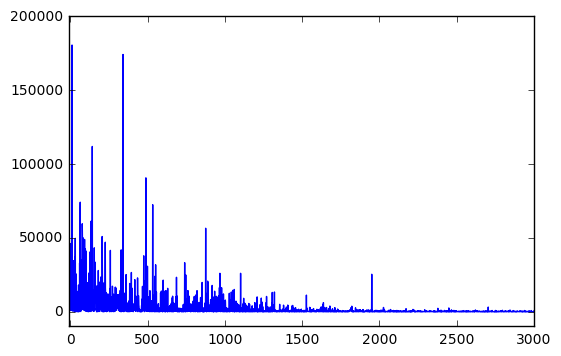

In [25]:
# Cost function
plt.plot((costFunc))
plt.ylim([-10000, 200000])
plt.xlim([-10, 3000])

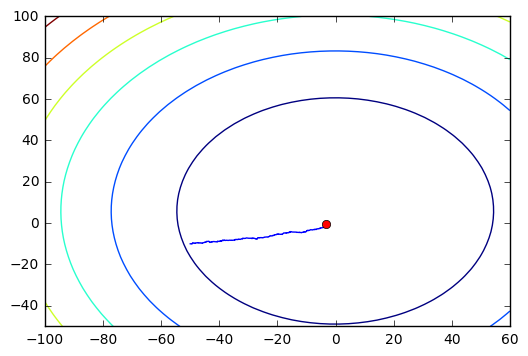

In [27]:
# Contour Function
X = train.iloc[:,(0,1)].values
y = train.iloc[:,-1].values

theta0 = np.linspace(-50,100,50)
theta1 = np.linspace(-100,60,50)
J = np.zeros((50,50))

for i in np.arange(len(theta0)):
    for j in range(len(theta0)):
        theta = np.array(list([theta0[i],theta1[j]]))
        J[i,j] = sum((X.dot(theta)-y)**2)/(2*len(y))
        
train2 = train.iloc[:,(1,2,-1)]
coeff,cost,cos = coefficients(0.001,train2,epochs=1)
coefs = np.array(cos)
plt.contour(theta1,theta0,J)
plt.ylim(-50,100) 
plt.xlim(-100,60)
plt.plot(coefs[:,0],coefs[:,1])
plt.plot(coeff[0],coeff[1],'ro')
